# Image Effect - Pseudo-Halftone
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [imgFX_pseudoHalftone.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Generative/imgFX_pseudoHalftone.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, time
from PIL import Image as image

from _utils import *

In [2]:
def setRange(value, smin, smax, dmin, dmax):
    '''
    Linear interpolation
    '''
    value = float(value)
    smin, smax = float(smin), float(smax)
    dmin, dmax = float(dmin), float(dmax)
    out = dmin + ((value - smin)/(smax - smin))*(dmax - dmin)
    return int(out)

## 1. Additive mode
---

In [3]:
class PointAdd:
    def __init__(self, tx, ty, cd):
        self.tx = tx
        self.ty = ty
        self.cd = cd
    
    def setRad(self, ioc):
        '''
        Radius definition
        '''
        self.rad = setRange(self.cd[ioc], 0, 255, minSize, maxSize)
    
    def circle(self, ioc):
        '''
        Draw a circle
        '''
        r1 = self.rad
        r2 = self.rad + antAlsg
        disp = (sb*0.5 - self.rad)*dispMult
        dispx = int(random.uniform(- disp, disp))
        dispy = int(random.uniform(- disp, disp))
        tx = self.tx + dispx
        ty = self.ty + dispy
        for y in range(ty - r2, ty + r2):
            for x in range(tx - r2, tx + r2):
                try:
                    dx = math.pow(tx - x, 2.0)
                    dy = math.pow(ty - y, 2.0)
                    r = math.sqrt(dx + dy)
                    if r <= r1:
                        ca = 1
                    elif r > r2:
                        ca = 0
                    else:
                        ca = (r2 - r)/(r2 - r1)
                    cdt = imgOut.getpixel((x, y))
                    if(cnorm == True):
                        cc = int(255*ca + cdt[ioc])
                    else:
                        cc = int(self.cd[ioc]*ca + cdt[ioc])
                    if(ioc == 0):
                        imgOut.putpixel((x, y), (cc, cdt[1], cdt[2]))
                    elif(ioc == 1):
                        imgOut.putpixel((x, y), (cdt[0], cc, cdt[2]))
                    else:
                        imgOut.putpixel((x, y), (cdt[0], cdt[1], cc))
                except:
                    continue

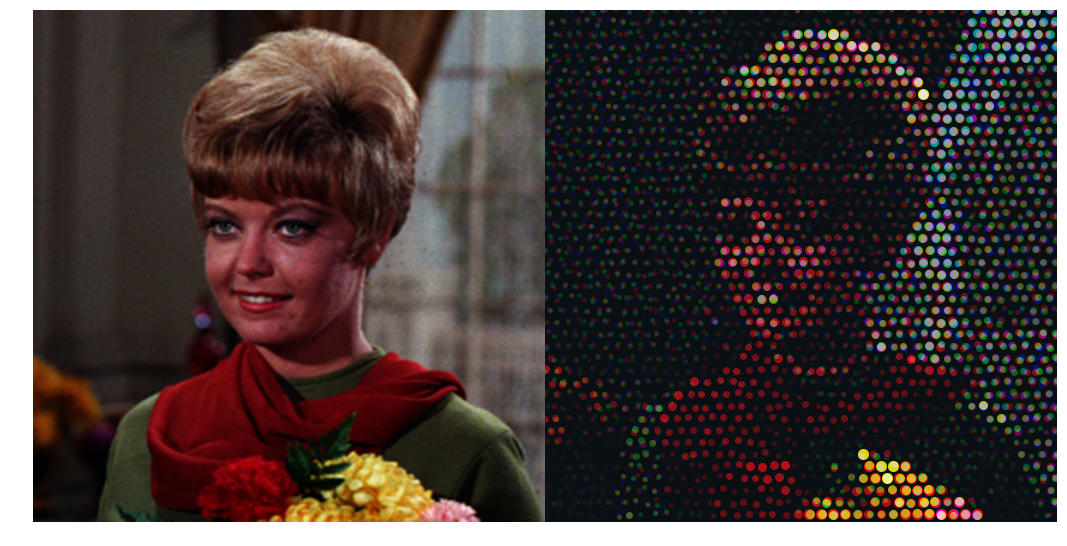

Wall time: 2.2 s


In [4]:
%%time
# parameters
sb = 12            # space between the center of the points
minSize = 2        # minimum size
maxSize = 6        # maximum size
dispMult = 1.0     # channel dispersion
cnorm = False      # switch for color normalization
antAlsg = 1        # circle antialiasing
BG = (10, 15, 20)  # background color

# init
img = image.open('../_data/woman03.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execução
lpt = []
y, i = 0, 0
while(y < imy):
    x = int(sb*0.5)*(i % 2)     # shifting points in the even lines
    while(x < imx):
        cd = imgIn.getpixel((x, y))
        temp = PointAdd(x, y, cd)
        lpt.append(temp)
        x += sb
    i += 1
    y += sb
for channel in range(3):
    for point in lpt:
        point.setRad(channel)
        point.circle(channel)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))

## 2. Subtractive mode
---

In [5]:
class PointSub:
    def __init__(self, tx, ty, cd):
        self.tx = tx
        self.ty = ty
        self.cd = cd
        
    def setRad(self, ioc):
        '''
        Radius definition
        '''
        self.rad = setRange(self.cd[ioc], 0, 255, maxSize, minSize)
    
    def circle(self, ioc):
        '''
        Draw circle
        '''
        r1 = self.rad
        r2 = self.rad + antAlsg
        disp = (sb*0.5 - self.rad)*dispMult
        dispx = int(random.uniform(- disp, disp))
        dispy = int(random.uniform(- disp, disp))
        tx = self.tx + dispx
        ty = self.ty + dispy
        for y in range(ty - r2, ty + r2):
            for x in range(tx - r2, tx + r2):
                try:
                    dx = math.pow(tx - x, 2.0)
                    dy = math.pow(ty - y, 2.0)
                    r = math.sqrt(dx + dy)
                    if r <= r1:
                        ca = 1
                    elif r > r2:
                        ca = 0
                    else:
                        ca = (r2 - r)/(r2 - r1)
                    cdt = imgOut.getpixel((x, y))
                    if(cnorm == True):
                        cc = int(cdt[ioc] - 255*ca)
                    else:
                        cc = int(cdt[ioc] - self.cd[ioc]*ca)
                    if(ioc == 0):
                        imgOut.putpixel((x, y), (cc, cdt[1], cdt[2]))
                    elif(ioc == 1):
                        imgOut.putpixel((x, y), (cdt[0], cc, cdt[2]))
                    else:
                        imgOut.putpixel((x, y), (cdt[0], cdt[1], cc))
                except:
                    continue

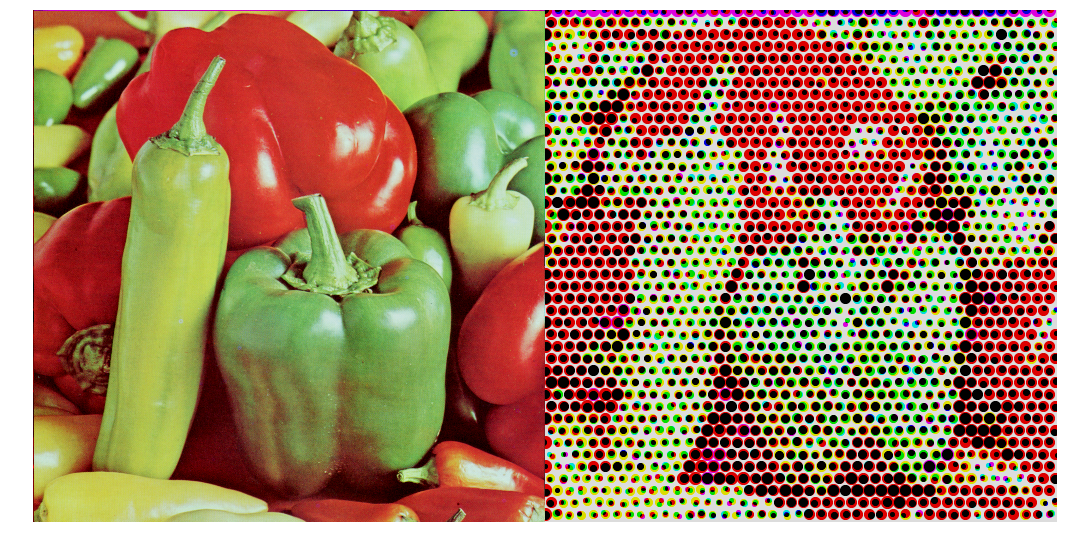

Wall time: 3.09 s


In [6]:
%%time
# parameters
sb = 12               # space between the center of points
minSize = 2           # minimum size
maxSize = 6           # maximum size
dispMult = 0.75       # channel dispersion
cnorm = True          # switch for color normalization
antAlsg = 1           # circle antialiasing
BG = (220, 220, 220)  # background color

# init
img = image.open('../_data/pimentos.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
lpt = []
y, i = 0, 0
while(y < imy):
    x = int(sb*0.5)*(i % 2)     # shifting points in the even lines
    while(x < imx):
        cd = imgIn.getpixel((x, y))
        temp = PointSub(x, y, cd)
        lpt.append(temp)
        x += sb
    i += 1
    y += sb
for channel in range(3):
    for point in lpt:
        point.setRad(channel)
        point.circle(channel)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))